In [379]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import ANN_classes
%matplotlib inline

In [2]:
csvdata = []
with open('data_m.csv', 'rb') as gtu_file:
    reader = csv.reader(gtu_file)
    for row in reader: 
        csvdata.append(row)
data_m = np.array(csvdata, str)

In [3]:
data_Nfp = np.add(
            np.multiply(
                data_m[:, 13].astype(float),
                data_m[:, 14].astype(float)),
            data_m[:, 28].astype(float))

In [4]:
Qvpg = 8251*4.1868  # кДж/м3
rhopg = 0.7078  # кг/м3
Qmpg = Qvpg / rhopg # кДж/кг

In [5]:
Qmptr = []
Qvptr = []
Etam = np.array([])

for i in np.arange(len(data_m)):
    # массовый расход
    Qmptr.append(Qmpg*float(data_m[i, 36])/3600)  # кДж*с
    try:
        Etam = np.append(Etam, float(data_Nfp[i])/(Qmptr[i]*1000))  # %
    except ZeroDivisionError:
        Etam = np.append(Etam, 0)

In [2042]:
N_ladder = [np.arange(*i) for i in [(118, 174), (184,304), (310,372), (374,476), (486,574), (586,648),
                                    (676,760), (770,844), (852,1058), (1130,1402), (1412,1486), (1498,1594),
                                    (1700,1734),  # Вот здесь будем приклеивать ещё один кусочек
                                    (1820,1892), (1896,1950), (2042,2132)]]
N_ladder[12] = np.append(N_ladder[12], np.arange(1798,1818))  # Доклеиваем кусочек

# Выборки по мощности и остальным параметрам (необработанные)
data_Nfp_seq = [data_Nfp[i] for i in N_ladder]
data_Etam = [Etam[i] for i in N_ladder]
data_TET = [data_m[i, 3].astype(float) for i in N_ladder]
# data_Tug = [data_criomean[i] for i in N_ladder]
data_nob = [data_m[i, 1].astype(float) for i in N_ladder]
data_G1t = [data_m[i, 36].astype(float) for i in N_ladder]
data_Ptp = [data_m[i, 11].astype(float) for i in N_ladder]
# data_Nsn_ld = [data_Nsn[i] for i in N_ladder]

In [2043]:
import custom_classes
reload(custom_classes)
sWorker = custom_classes.StatWorker()

In [2044]:
data_Etam_mask = [sWorker.clean3sigma(i) for i in data_Etam]
data_Etam_Nfp_mask = [sWorker.clean3sigma(i[0][i[1]]) for i in zip(data_Nfp_seq, data_Etam_mask)]
sWorker.set_alpha(0.05)
data_Nfp_Etam_seq_masked_means = [i[0][i[1]][i[2]].mean() 
                             for i in zip(data_Nfp_seq, data_Etam_mask, data_Etam_Nfp_mask)]
data_Nfp_Etam_seq_masked_means = np.array(data_Nfp_Etam_seq_masked_means)
data_Etam_masked_means = [i[0][i[1]][i[2]].mean() 
                          for i in zip(data_Etam, data_Etam_mask, data_Etam_Nfp_mask)]
data_Etam_masked_means = np.array(data_Etam_masked_means)
data_Etam_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Etam, data_Etam_mask, data_Etam_Nfp_mask)]
data_Nfp_Etam_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Nfp_seq, data_Etam_mask, data_Etam_Nfp_mask)]

In [2045]:
# ТЕТ
data_TET_mask = [sWorker.clean3sigma(i) for i in data_TET]
data_TET_Nfp_mask = [sWorker.clean3sigma(i[0][i[1]]) for i in zip(data_Nfp_seq, data_TET_mask)]
data_Nfp_TET_seq_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_Nfp_seq, data_TET_mask, data_TET_Nfp_mask)]
data_TET_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_TET, data_TET_mask, data_TET_Nfp_mask)]
data_TET_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_TET, data_TET_mask, data_TET_Nfp_mask)]
data_Nfp_TET_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Nfp_seq, data_TET_mask, data_TET_Nfp_mask)]
# Tug
# data_Tug_mask = [sWorker.clean3sigma(i) for i in data_Tug]
# data_Tug_Nfp_mask = [sWorker.clean3sigma(i[0][i[1]]) for i in zip(data_Nfp_seq, data_Tug_mask)]
# data_Nfp_Tug_seq_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_Nfp_seq, data_Tug_mask, data_Tug_Nfp_mask)]
# data_Tug_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_Tug, data_Tug_mask, data_Tug_Nfp_mask)]
# data_Tug_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Tug, data_Tug_mask, data_Tug_Nfp_mask)]
# data_Nfp_Tug_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Nfp_seq, data_Tug_mask, data_Tug_Nfp_mask)]
# nob
data_nob_mask = [sWorker.clean3sigma(i) for i in data_nob]
data_nob_Nfp_mask = [sWorker.clean3sigma(i[0][i[1]]) for i in zip(data_Nfp_seq, data_nob_mask)]
data_Nfp_nob_seq_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_Nfp_seq, data_nob_mask, data_nob_Nfp_mask)]
data_nob_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_nob, data_nob_mask, data_nob_Nfp_mask)]
data_nob_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_nob, data_nob_mask, data_nob_Nfp_mask)]
data_Nfp_nob_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Nfp_seq, data_nob_mask, data_nob_Nfp_mask)]
# G1t
data_G1t_mask = [sWorker.clean3sigma(i) for i in data_G1t]
data_G1t_Nfp_mask = [sWorker.clean3sigma(i[0][i[1]]) for i in zip(data_Nfp_seq, data_G1t_mask)]
data_Nfp_G1t_seq_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_Nfp_seq, data_G1t_mask, data_G1t_Nfp_mask)]
data_G1t_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_G1t, data_G1t_mask, data_G1t_Nfp_mask)]
data_G1t_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_G1t, data_G1t_mask, data_G1t_Nfp_mask)]
data_Nfp_G1t_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Nfp_seq, data_G1t_mask, data_G1t_Nfp_mask)]
# Ptp
data_Ptp_mask = [sWorker.clean3sigma(i) for i in data_Ptp]
data_Ptp_Nfp_mask = [sWorker.clean3sigma(i[0][i[1]]) for i in zip(data_Nfp_seq, data_Ptp_mask)]
data_Nfp_Ptp_seq_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_Nfp_seq, data_Ptp_mask, data_Ptp_Nfp_mask)]
data_Ptp_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_Ptp, data_Ptp_mask, data_Ptp_Nfp_mask)]
data_Ptp_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Ptp, data_Ptp_mask, data_Ptp_Nfp_mask)]
data_Nfp_Ptp_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Nfp_seq, data_Ptp_mask, data_Ptp_Nfp_mask)]
# Nsn_ld
# data_Nsn_ld_mask = [sWorker.clean3sigma(i) for i in data_Nsn_ld]
# data_Nsn_ld_Nfp_mask = [sWorker.clean3sigma(i[0][i[1]]) for i in zip(data_Nfp_seq, data_Nsn_ld_mask)]
# data_Nfp_Nsn_ld_seq_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_Nfp_seq, data_Nsn_ld_mask, data_Nsn_ld_Nfp_mask)]
# data_Nsn_ld_masked_means = [i[0][i[1]][i[2]].mean() for i in zip(data_Nsn_ld, data_Nsn_ld_mask, data_Nsn_ld_Nfp_mask)]
# data_Nsn_ld_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Nsn_ld, data_Nsn_ld_mask, data_Nsn_ld_Nfp_mask)]
# data_Nfp_Nsn_ld_conf = [sWorker.conf_level(i[0][i[1]][i[2]])['rng'] for i in zip(data_Nfp_seq, data_Nsn_ld_mask, data_Nsn_ld_Nfp_mask)]

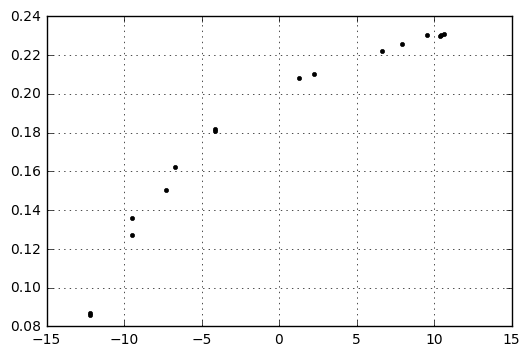

In [1605]:
fig = plt.figure()
ax1 = plt.subplot(111)
ax1.plot(data_Nfp_Etam_seq_masked_means/1000-15, data_Etam_masked_means, 'k.')
ax1.grid(True)
plt.show()

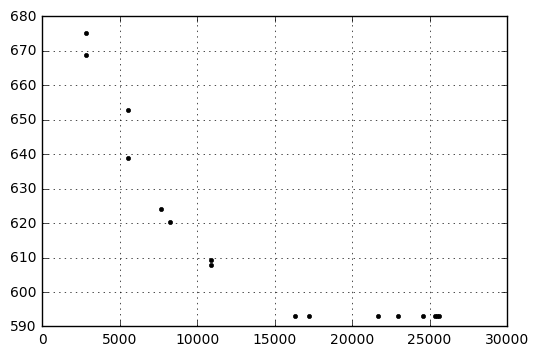

In [2048]:
fig = plt.figure()
ax1 = plt.subplot(111)
ax1.plot(data_Nfp_TET_seq_masked_means, data_TET_masked_means, 'k.')
ax1.grid(True)
plt.show()

In [2218]:
set_input = data_Nfp_Etam_seq_masked_means/1000-15
set_input = np.append(set_input, [0-15])
set_output = np.append(data_Etam_masked_means*100,[0])

In [2484]:
set_input = np.array(data_Nfp_TET_seq_masked_means)/1000.
set_output = data_TET_masked_means

In [2337]:
set_input = np.arange(0, 50)
set_output = (np.random.normal(0,0.1,50)*10+10)*np.linspace(1,2,50)

In [1373]:
ANN2 = ANN_classes.NNetwork(1,5,2)

In [2774]:
reload(ANN_classes)

<module 'ANN_classes' from 'ANN_classes.py'>

In [2775]:
ANN1 = ANN_classes.NNetwork(1, 10, 1)
# ANN1.cfg_input(2)
ANN1.cfg_mass()
ANN1.cfg_type()
# ANN1.nwgh_reset(-0.2)
ANN1.nwgh_randomize(4,4)
ANN_iter = 0

Ann_iter: 7


ANN_classes.py:92: RuntimeWarning: overflow encountered in multiply
  


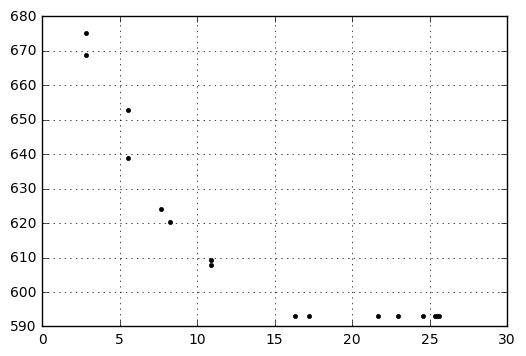

In [2786]:
for _ in xrange(1):
    pick = np.random.randint(len(set_input))
#     pick = 0
    ANN1.forward([set_input[pick]])
#     print ANN1.Vii
    ANN1.getnetgrad([set_output[pick]])
    ANN1.backward()
    ANN1.ncommit()
    ANN1.forward([set_input[pick]])
    ANN1.VLoo[0].v[0]
    #######
    dxx = np.linspace(min(set_input), max(set_input), 100)
    dyy = np.zeros([100])
#     dyy_p = np.zeros([100,51])
    ANN_iter += 1
c = 0
for x in dxx:
    ANN1.forward([x])
    dyy[c] = ANN1.VLoo[0].v[0]
#     dyy_p[c] = ANN_classes.unpackval(ANN1.VL1)[0]*ANN1.Loo[0].Vw.v
    c += 1
print 'Ann_iter: {}'.format(ANN_iter)
fig = plt.figure()
ax1 = plt.subplot(111)
# ax2 = ax1.twinx()
ax1.plot(set_input, set_output, 'k.')
ax1.plot(dxx, dyy, 'k-')
# [ax1.plot(dxx, dyy_p[:,i], 'g-') for i in xrange(len(dyy_p[0, :]))]
ax1.grid(True)
# ax1.set_ylim(0,25)
# ax1.set_xlim(-1,15)
plt.show()

In [2781]:
ANN1.L1[4].pullback

0.22636697681273837

In [1433]:
ANN1.Loo[0].Vw.v

array([ 0.13476499,  0.5970486 , -0.29886323, -0.3401458 , -0.33021204,
       -0.14723935,  1.51861201, -0.17028222,  0.72728721,  0.96871099,
        0.77125347,  0.33693437,  0.76836921,  0.89971771,  1.04537141,
        0.23253808, -0.36324752,  0.14052754, -0.01577861, -0.30930624,
        2.86195607])

In [638]:
ANN1.Lii[0].Vw.v

array([ 1.77171665])

In [2512]:
inp = 1
print u'input = {}'.format(inp)
ANN1.forward([5])
Lii_out = max(0, inp*ANN1.Lii[0].Vw.v)
print u'Lii out = {}'.format(Lii_out)
L1_out = [max(0, Lii_out*neur.Vw.v[0] + neur.Vw.v[1]) for neur in ANN1.L1]
print u'L1 out = {}'.format(L1_out)
print u'L1 sum = {}'.format(np.sum(L1_out))
Loo_out = [max(0, L1_syn*Loo_w+ANN1.Loo[0].Vw.v[-1]) for L1_syn, Loo_w in zip(L1_out, ANN1.Loo[0].Vw.v[:-1])]
# Loo_out = L1_out*ANN1.Loo[0].Vw.v[:-1] + ANN1.Loo[0].Vw.v[-1]
print u'Loo out = {}'.format(Loo_out)

input = 1
Lii out = 0
L1 out = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
L1 sum = 0
Loo out = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


C:\Users\vpribylov\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in greater


In [624]:
ANN1.Lii[0].Vw.v

array([-0.94088116])

In [582]:
[neur.Vw.v[0] for neur in ANN1.L1]
# [neur.Vw.v[1] for neur in ANN1.L1]

[1.2261037784347131,
 -0.94825756910732162,
 -0.34671558273263781,
 2.7165255100859222,
 2.0952582560237518,
 1.0023666937299083,
 1.7354153106662509,
 2.4093947526163957,
 0.22637790659794843,
 -0.76706252583584256]

In [583]:
ANN1.Loo[0].Vw.v[:-1]

array([ 1.45767131,  0.88830163,  1.26147091, -0.87483239,  2.1508143 ,
       -0.7651941 , -1.04680069,  2.67102559,  1.23315654,  2.72181449])

Ann_iter: 1002


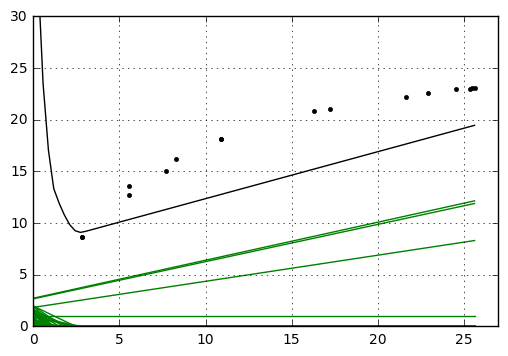

In [941]:
c = 0
for x in dxx:
    ANN1.forward([x])
    dyy[c] = ANN1.VLoo[0].v[0]
    dyy_p[c] = ANN_classes.unpackval(ANN1.VL1)[0]*ANN1.Loo[0].Vw.v
    dyy_p[c] = ANN_classes.unpackval(ANN1.VL1)[0]
    c += 1
print 'Ann_iter: {}'.format(ANN_iter)
fig = plt.figure()
ax1 = plt.subplot(111)
# ax2 = ax1.twinx()
ax1.plot(set_input, set_output, 'k.')
ax1.plot(dxx, dyy, 'k-')
[ax1.plot(dxx, dyy_p[:,i], 'g-') for i in xrange(len(dyy_p[0, :]))]
ax1.grid(True)
ax1.set_xlim(0,27)
ax1.set_ylim(0,30)
plt.show()

In [450]:
ANN1.forward([-5])

array([[ 6.80767907,  1.        ]])

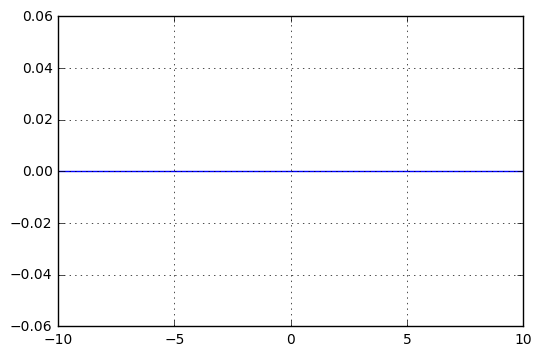

In [255]:
w1 = -1
w2 = -1
xs = np.linspace(-10,10,100)
ys = [max(0,max(0,x*w1)*w2) for x in xs]
plt.figure()
plt.plot(xs, ys)
plt.grid()
plt.show()